# *Scalpers Suck*
### Table of Contents
#### 1 - Intro
#### 2 - Game Plan
#### 3 - Scraping and CSV's
#### 4 - Trials & Tribulations
#### 5 - Graphing and Trends
#### 6 - Conclusions

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Intro
<br>
For this project we wanted to make a notebook that flexed our new python toolkit. It had to include a scraper for gathering data, Seaborn and Matplotlib graphs for visuals, and a regression line to predict the future of our data. We went through multiple ideas, from social media analysis, to google search trends but ultimately settled on the rising trend of scalping. Scalping is when a person buys a product that is in high demand, only to turn around and sell it for a marked up price. This technique is time sensitive, and only works when the supply has not met the demand. With the global pandemic slowing the supply chain, we wanted to show just how unbelievable scalping has become.

## Game Plan
<br>
First off, we needed data. ALOT of data. We set our eyes upon eBay, a platform that opens its arms to scalpers around the world. We settled on researching the PS5, which has become notorious as an expensive item with an unbelivable demand that has horrible supply chain issues. A quick search showed that the PS5 was being scalped for more than double its MSRP (Manufacturer Suggested Retail Price). With that, we had a target. We needed the current listings, and the sales history since its release. This information was public but very hard to access, and storing it all in a database by hand would take weeks. We needed a scraper.

## Scraping & CSV's

#### Roadblocks
<br>
We hit a wall early on in the data we were scraping. CSV file columns are created by separating data points by commas. Every time we would scrape a listing title that had a comma in it(NEW PS5, DIGITAL COPY, PARER EDITION, 600), our graphing tools would freak out and think it was indicating a new column. We got around this by running all the titles through a replace method, where we replaced all ',' with a space ' '. So 'NEW PS5, DIGITAL COPY, PAPER EdITION, 600' became 'NEW PS5  DIGITAL COPY  PAPER EDITION, 600' and solved that roadblock.

## Graphing and Trends
<br>
Now that we have concrete data, we can make graphs to help draw conclusions.

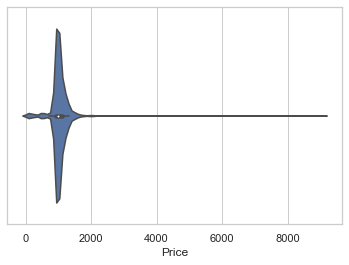

In [2]:
# December 8 - November 30 Sales Data Violin Plot
sns.set_theme(style='whitegrid')
df_tues_sold = pd.read_csv('data/sold_scrape_tuesday.csv')
orchestra = sns.violinplot(x=df_tues_sold['Price'], inner='box', )

The outliers in our data destroy this graph

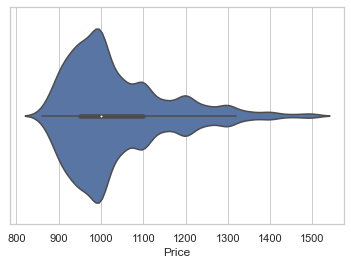

In [3]:
# December 8 - November 30 Sales Data Violin Plot (Outliers Cut)
sorting_asc = df_tues_sold.sort_values(by='Price', ascending=True).tail(9000)
sorting_asc_filtered_top = sorting_asc[df_tues_sold['Price'] < 1500]
orchestra = sns.violinplot(x=sorting_asc_filtered_top['Price'], inner='box')


In [6]:
mean_ = sorting_asc_filtered_top.mean()\
mean_


SyntaxError: invalid syntax (<ipython-input-6-fab0d8e5d084>, line 2)

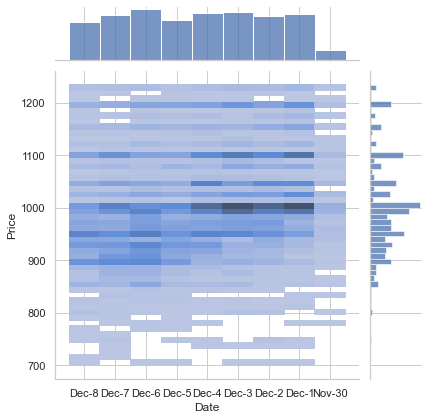

In [5]:
# December 8 - November 30 Sales Data Joint Plot
price =  df_tues_sold['Price']
price = price[price.between(price.quantile(.05), price.quantile(.90))]
dates = df_tues_sold['Date']
joint = sns.jointplot(x=dates, y=price, kind='hist')

### December 8 New PS5 Listings Violin Plot

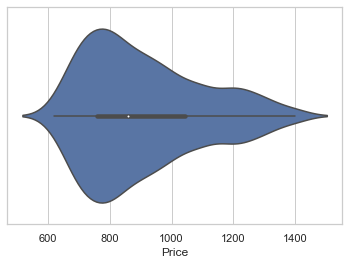

In [4]:
items = pd.read_csv('data/new_ebay_tues.csv')
price = items['Price']
price = price[price.between(price.quantile(.05), price.quantile(.95))]
orchestra = sns.violinplot(x=price)

#### Roadblocks
<br> 
Making graphs of our sold listing was a serious problem, because there were many outliers in our data set. To combat this we used the between method, which let us dynamically cut out outliers.

## Conclusions